### Necessary Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [3]:
# Reading data from the 'dataset.csv' using pandas as dataframe
data = pd.read_csv('dataset.csv')   

### Visualize Datapoints in Data

This code creates a scatter plot of the data points in the `data` DataFrame. The `data.Hours` and `data.Scores` columns are used as the x and y values for the scatter plot. The `xlabel`, `ylabel`, and `title` functions are used to set the labels for the x and y axes and the title for the plot, respectively. Finally, the `show` function is called to display the plot.

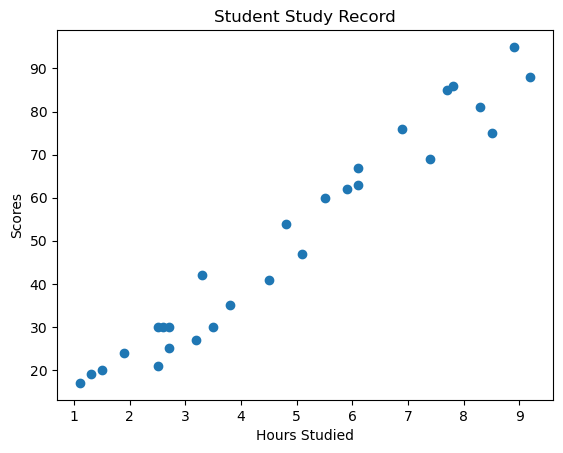

In [4]:
# Plot the data points as a scatter plot
plt.scatter(data.Hours, data.Scores)

# Set the labels for the x and y axes
plt.xlabel('Hours Studied')
plt.ylabel('Scores')

# Set the title for the plot
plt.title('Student Study Record')

# Display the plot
plt.show()

### Some Base Functions

This function creates a scatter plot of the data points in the `data` DataFrame and also plots the line defined by `y = m * x + b` (where `m` and `b` are the slope and y-intercept of the line). The `m` and `b` parameters represent the slope and y-intercept of the line being fit to the data.

In [6]:
def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    plt.scatter(data.Hours, data.Scores)
    
    # Plot the line defined by y = m * x + b
    min = int(data.Hours.min())
    max = int(data.Hours.max())+2
    plt.plot(list(range(min, max)), [m * x + b for x in range(min, max)], color='red')
    
    # Set the labels for the x and y axes
    plt.xlabel('Hours Studied')
    plt.ylabel('Scores')        
    
    # Set the title for the plot
    plt.title('Student Study Record')
    
    # Display the plot
    plt.show()

This function calculates the average squared error between the predicted values (calculated using `m * x + c`) and the actual `y` values for all points in the dataset. The `m` and `c` parameters represent the slope and y-intercept of the line that is being fit to the data. The `points` parameter is a DataFrame containing the data points.

In [7]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    totalError = 0
    
    # Loop through all the points in the dataset
    for i in range(0, len(points)):
        # Get the x and y values of the current point
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        
        # Calculate the error for this point and add it to the total error
        totalError += (y - (m * x + c)) ** 2
    
    # Return the average error for all points
    return totalError / float(len(points))

This function performs one step of gradient descent to update the values of `m` and `b` (the slope and y-intercept of the line being fit to the data). The `m_now` and `b_now` parameters represent the current values of `m` and `b`, while `points` is a DataFrame containing the data points. The `L` parameter is the learning rate, which controls how big of a step to take in the direction of the negative gradient.

In [9]:
def gradien_descent(m_now, b_now, points, L):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0
    
    # Get the number of points in the dataset
    n = len(points)

    # Loop through all the points in the dataset
    for i in range(n):
        # Get the x and y values of the current point
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        
        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    
    # Update m and b using gradient descent
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)
    
    # Return the updated values of m and b
    return m, b

This code performs gradient descent to fit a line to the data in the `data` DataFrame. The `m` and `b` variables represent the slope and y-intercept of the line being fit to the data. The `lr` variable is the learning rate for gradient descent, while `epochs` is the number of epochs (iterations) to perform. The code uses the `gradien_descent` function defined earlier to update the values of `m` and `b` at each epoch. The `loss_function` function is also used to calculate the error at each epoch. Every 50 epochs, the code calls the `plot_data` function to plot the data and the current line being fit to it.

Epoch 0 - Error: 3063.9347690104246


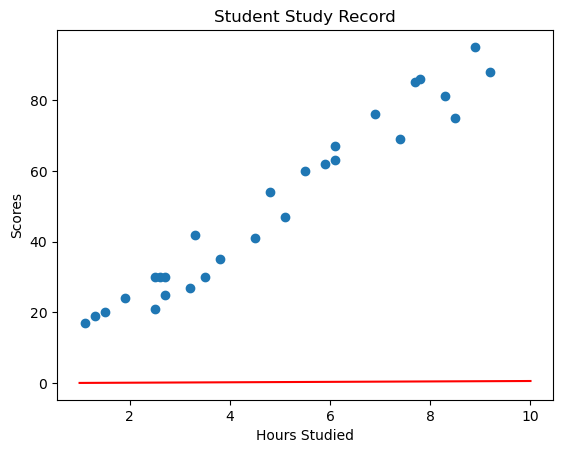

None
Epoch 5 - Error: 2884.7072894559537


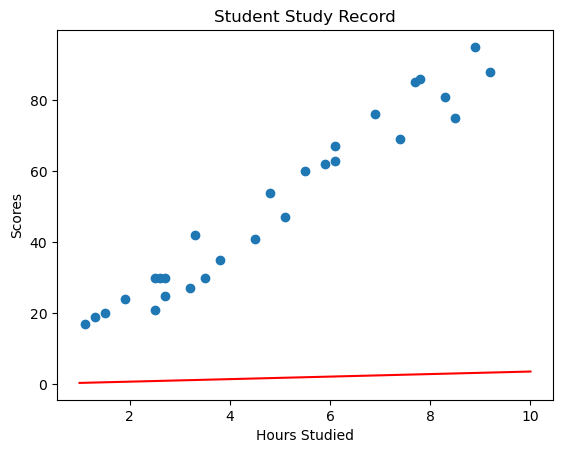

None
Epoch 10 - Error: 2716.056656733371


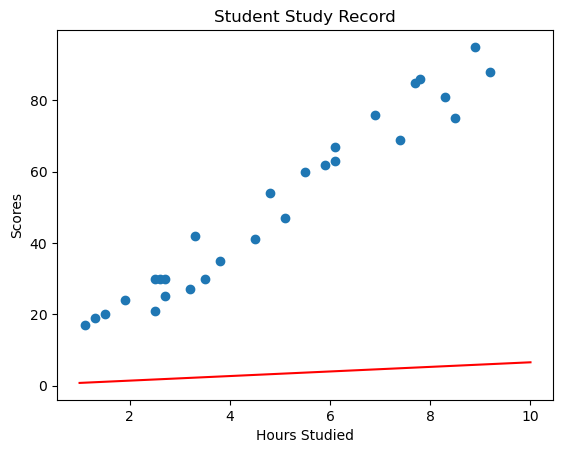

None
Epoch 15 - Error: 2557.358693023998


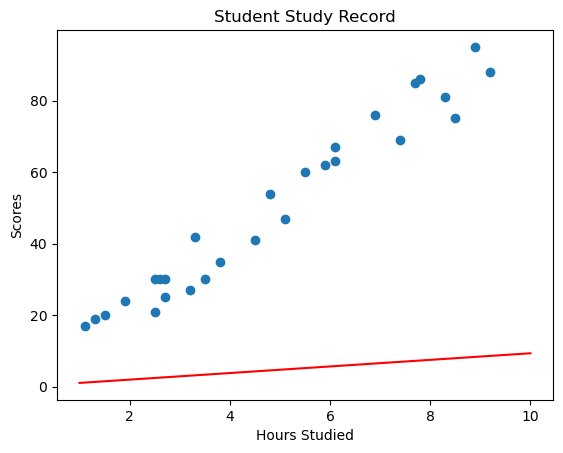

None
Epoch 20 - Error: 2408.0260554901893


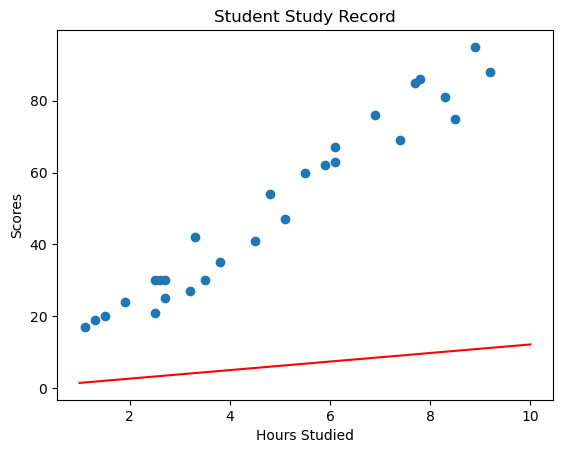

None
Epoch 25 - Error: 2267.506062510439


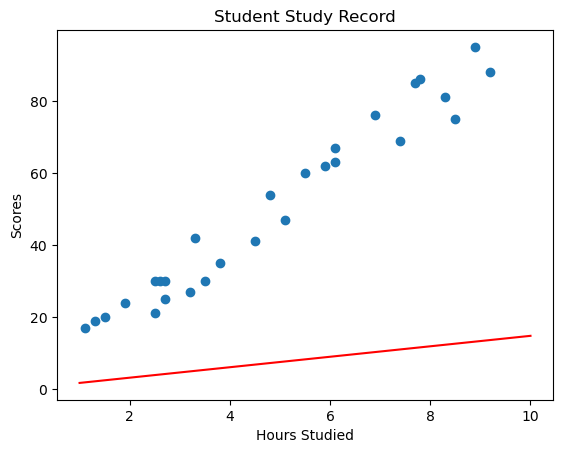

None
Epoch 30 - Error: 2135.2786481961825


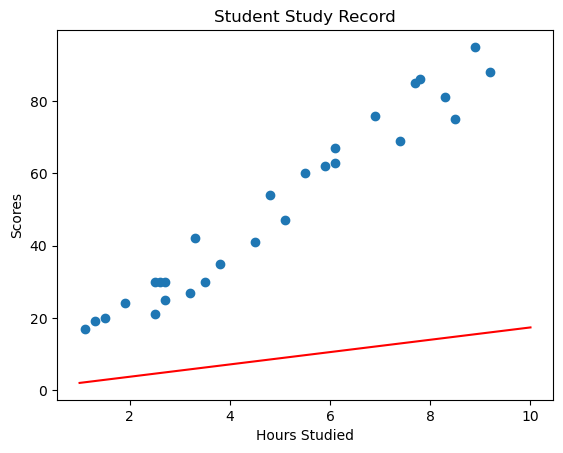

None
Epoch 35 - Error: 2010.8544376199407


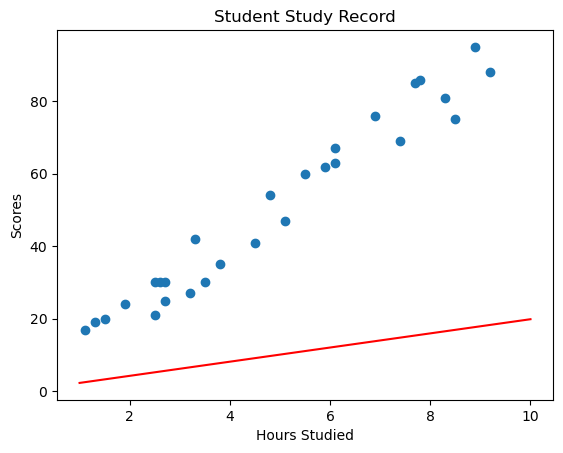

None
Epoch 40 - Error: 1893.7729356311609


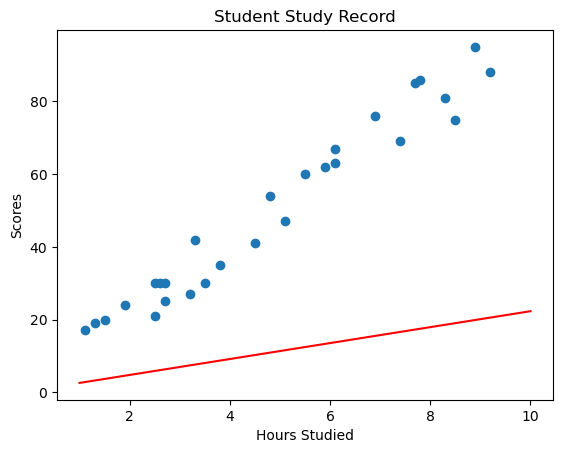

None
Epoch 45 - Error: 1783.6008225565824


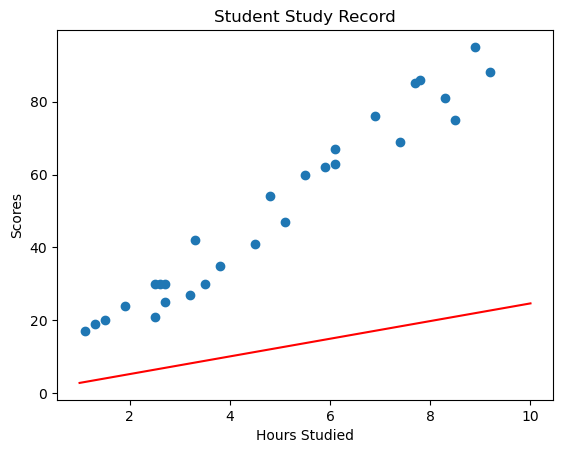

None
Epoch 50 - Error: 1679.9303504774432


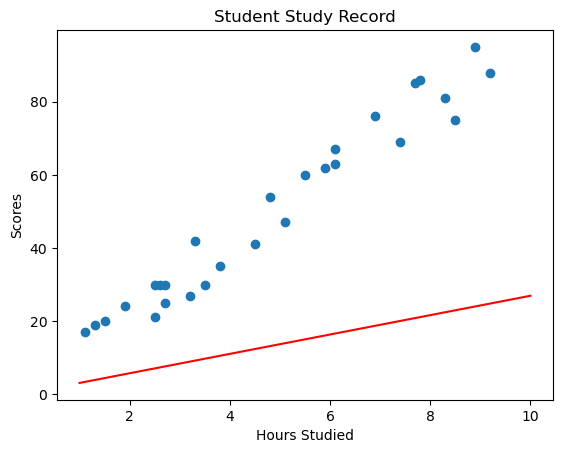

None
Epoch 55 - Error: 1582.3778341481557


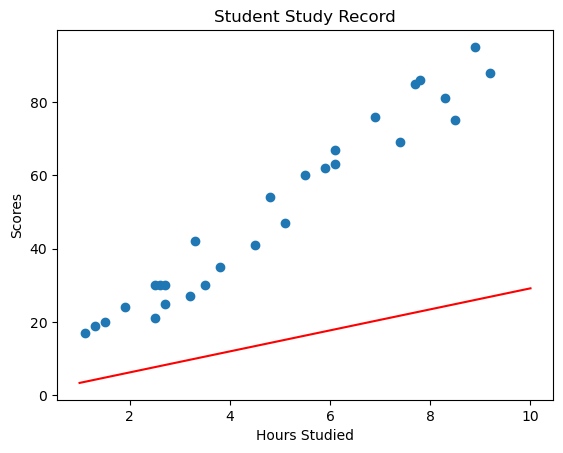

None
Epoch 60 - Error: 1490.5822309712978


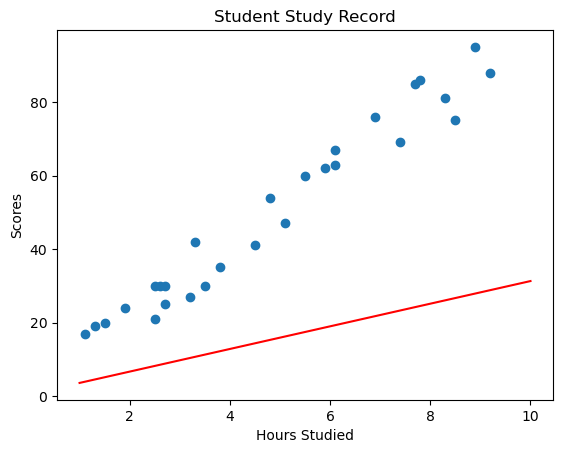

None
Epoch 65 - Error: 1404.2038047734018


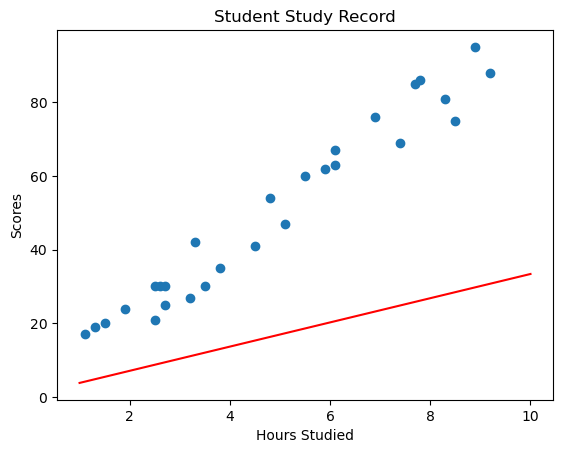

None
Epoch 70 - Error: 1322.9228684361399


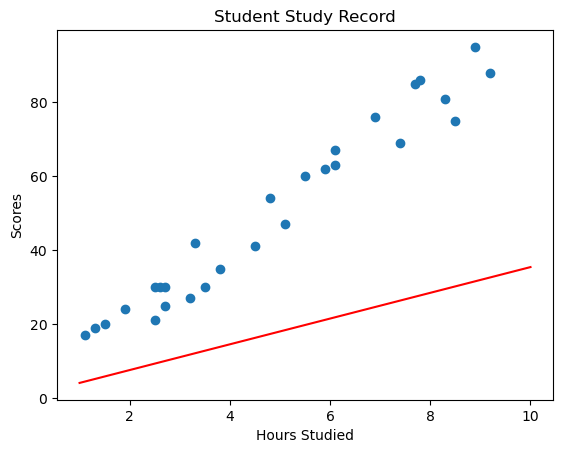

None
Epoch 75 - Error: 1246.4386007293756


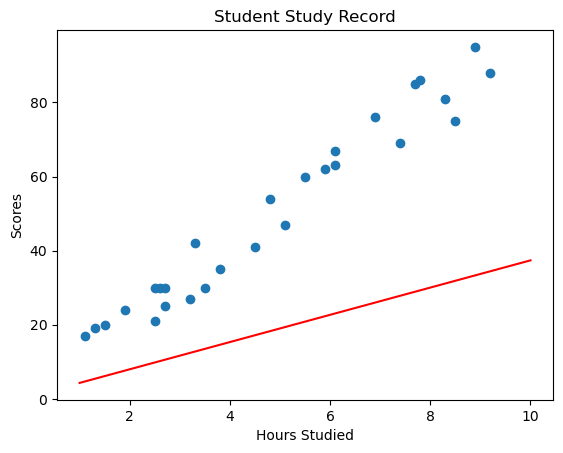

None
Epoch 80 - Error: 1174.4679329671574


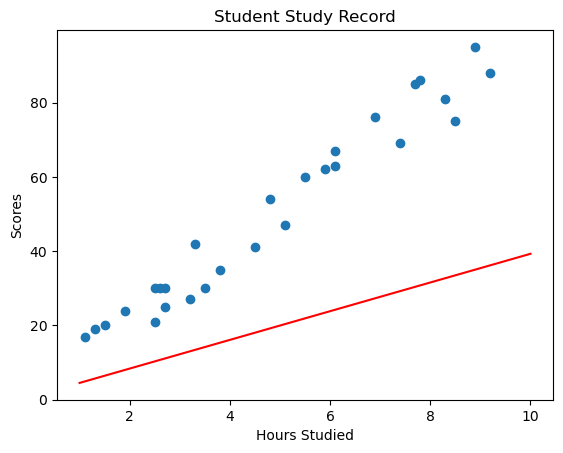

None
Epoch 85 - Error: 1106.7445013661493


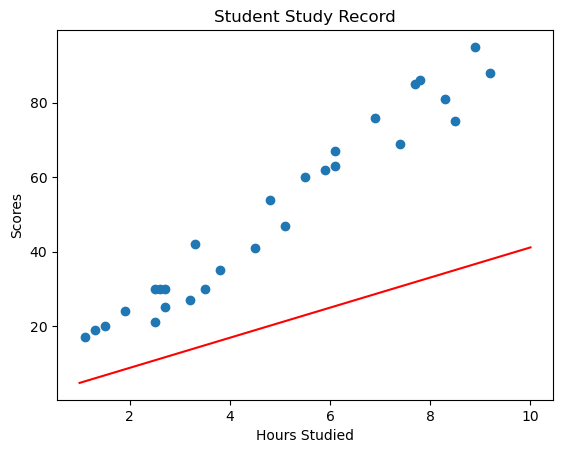

None
Epoch 90 - Error: 1043.0176612291687


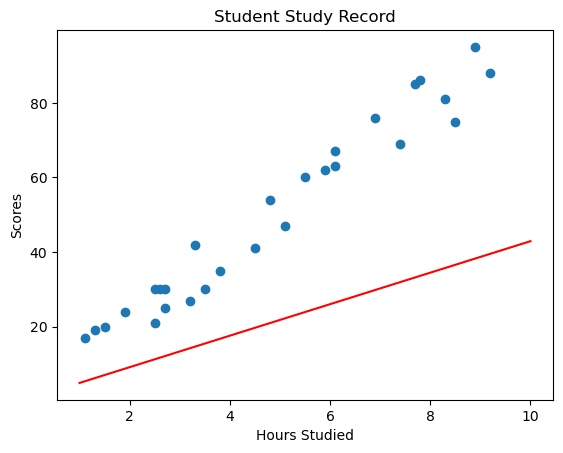

None
Epoch 95 - Error: 983.051559305297


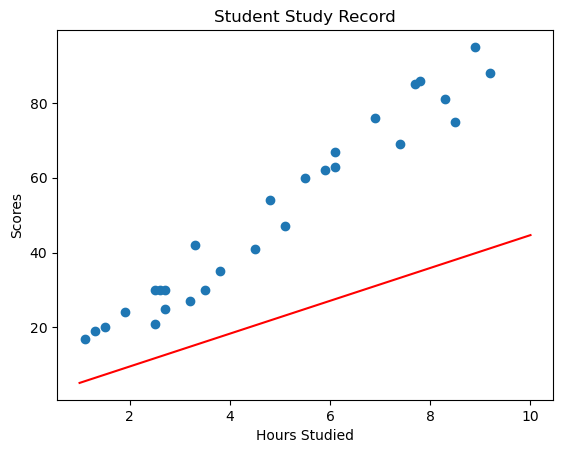

None
m = 4.526487698912051, b = 0.7525037966653022


In [10]:
# Initialize the values of m and b to 0
m = 0
b = 0
error_list = []
# Set the learning rate and number of epochs for gradient descent
lr = 0.0001
epochs = 100

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradien_descent(m, b, data, lr)
    error = loss_function(m, b, data)
    error_list.append(error)
    # Every 50 epochs, plot the data and the current line being fit to the data
    if i % 5 == 0:
        # Print the current epoch number and the error for this epoch
        print("Epoch {0} - Error: {1}".format(i, error))
        plot_data(m, b, data)
        print(plt.show())
        # also plot error and epoch number in a graph to see how error is decreasing

        # input('Press enter to continue...')

# Print the final values of m and b
print("m = {0}, b = {1}".format(m, b))

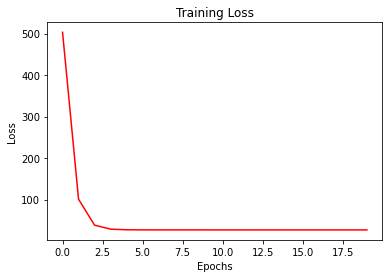

In [16]:
# plot the training loss and accuracy for each epoch in a graph using matplotlib library 
plt.plot(list(range(epochs)), error_list, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# print the accuracy in percentage of the model on the dataset using the loss function 
print(f'Accuracy: {100 - loss_function(m, b, data)}%') 

Accuracy: 73.52730308453383%


In [9]:
x = float(input("Enter the number of hours: "))
prediction = m * x + b
print(f'Prediction for {x} hours of study: {prediction}')


Prediction for 3.0 hours of study: 31.504964950254053


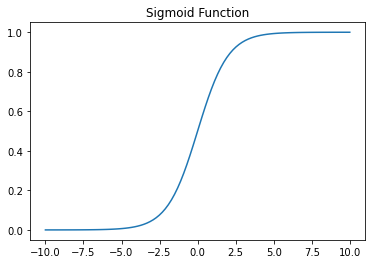

In [ ]:
# converting this linear model to a logistic regression model by using the sigmoid function to convert the output to a probability value between 0 and 1 
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot the sigmoid function
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

In [ ]:
# lets define a threshold value to convert the probability value to a binary value like if marks are greater than 50 then pass else fail 
def predict(x):
    return 1 if sigmoid(m * x + b) >= 0.5 else 0

# lets do prediction using the sigmoid function to convert the output to a probability value between 0 and 1 and then convert the probability value to a binary value like if marks are greater than 50 then pass else fail 
x = float(input("Enter the number of hours: "))
prediction = predict(x)
print(f'Prediction for {x} hours of study: {prediction}')


Prediction for 5.0 hours of study: 1
